In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb

In [2]:
def gen_hex(N, L, R):
    ratio = np.sqrt(3)/2 # cos(60°)
    N_X = int(np.sqrt(N))
    N_Y = N // N_X
    xv, yv = np.meshgrid(np.arange(N_X), np.arange(N_Y), sparse=False, indexing='xy')
    yv = yv.astype(float)
    xv = xv * ratio
    xv[::2, :] += ratio/2
    xv *= (L / (N_X-1))
    yv *= (L / (N_Y+1))
    xv += 3 * R 
    yv += 3 * R 
    return np.array([xv,yv]).reshape((2,-1)).T

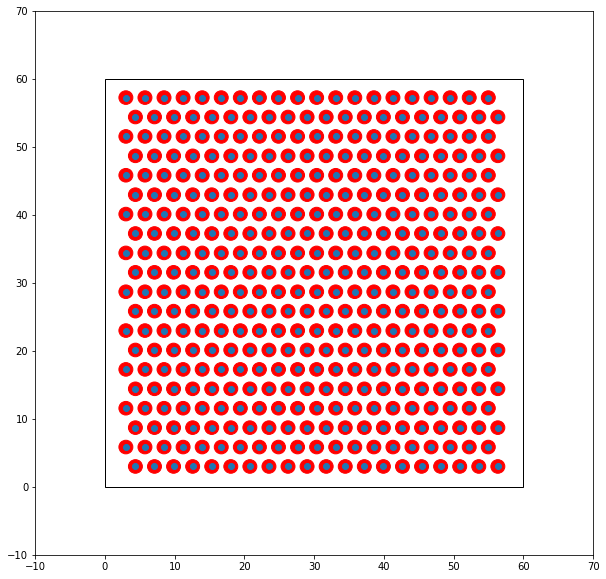

In [3]:
NA = 400  # atoms
AR = 1.0  # no interaction can happen outside this range
NN = 10   # neutrons at time 0
MN = 1024 # Max active neutrons
MI = 1000 # Max iterations
PE = 100  # Plot Every
L = 60.   # size
seed = 42
time = 0

rng_sd = np.random.default_rng(seed)
seed1 = rng_sd.integers(0,100)
rng_st = np.random.default_rng(seed1)
nuc = gen_hex(NA, L, AR)

fig, ax = plt.subplots(figsize=(10, 10))

for x,y in nuc:
    ax.add_artist(plt.Circle((x, y), AR, color='r'))
ax.add_artist(plt.Rectangle((0,0),L,L, linewidth=1, edgecolor='k', facecolor='none') )
plt.xlim(-10,70)
plt.ylim(-10,70)
ax.scatter(nuc[:,0],nuc[:,1])
plt.show()

Fixing Adsorption 158 52.19379070177296 23.46508839235164 52.226707162483876 23.0
Fixing Adsorption 181 6.417215788366462 28.73792724976302 5.734817064582438 28.714285714285715
Fixing Adsorption 63 11.083893410064894 11.631872934258642 11.204451193747314 11.571428571428571
Fixing Adsorption 121 8.039227907962744 19.757362602705232 7.102225596873657 20.142857142857142
Fixing Adsorption 299 57.36575463995397 43.206085512922066 56.32893275935754 43.0
Fixing Adsorption 109 26.994256565075936 16.56956115603879 27.613353581241938 17.285714285714285
Fixing Adsorption 291 33.90167638587147 42.251442905522424 34.450396242698034 43.0
Fixing Adsorption 4 15.401685476006918 3.8923932227531965 15.306676790620969 3.0


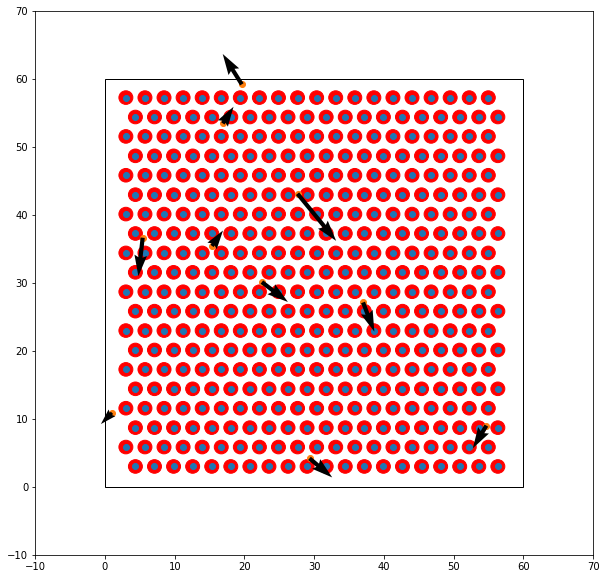

In [4]:
pos = np.zeros((MN,2))
vel = np.zeros((MN,2))
active = 0

while active < NN:
    nx,ny = rng_st.uniform(0,L,2)
    vx,vy = rng_st.uniform(-1,+1,2)
    accepted = True
    
    for a_i in range(NA):
        ax,ay = nuc[a_i]    
        dx = nx-ax
        dy = ny-ay
        d2 = dx*dx+dy*dy
        d  = np.sqrt(d2)
        if d < AR*1.1:
            print('Fixing Adsorption', a_i, nx,ny,ax,ay)
            accepted = False
            break
            
    if accepted:
        pos[active] = nx,ny
        vel[active] = vx,vy
        active += 1
        
fig, ax = plt.subplots(figsize=(10, 10))

for x,y in nuc:
    ax.add_artist(plt.Circle((x, y), AR, color='r'))
ax.add_artist(plt.Rectangle((0,0),L,L, linewidth=1, edgecolor='k', facecolor='none') )
plt.xlim(-10,70)
plt.ylim(-10,70)    
ax.scatter(nuc[:,0],nuc[:,1])
ax.scatter(pos[:active,0],pos[:active,1])
ax.quiver(pos[:active,0],pos[:active,1],vel[:active,0],vel[:active,1])
plt.show()

Scattering 2 10 0.37554909007597514


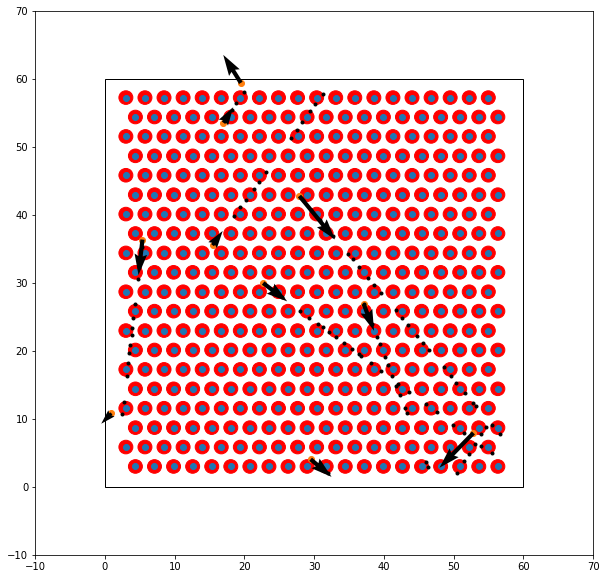

Adsorption 4 10 0.5081906710808323
Adsorption 5 9 0.638213014927634
Wall 0 8 1.3228075119303138
Adsorption 4 8 1.3627849644704253
Adsorption 4 7 1.8563197391819712
Adsorption 4 6 2.8961554014443
Fission 4 5 3.2199068691084696
Scattering 2 6 3.846049543432375
Adsorption 5 6 4.377055991097736
Wall 3 5 4.779785328447721
Scattering 0 5 5.441239156719769
Adsorption 2 5 6.748665408852103
Wall 2 4 6.962670058251955
Fission 0 4 7.065610212994451
Scattering 0 5 7.798866197556167
Scattering 4 5 8.228669076474265
Adsorption 0 5 8.508162498517587
Wall 0 4 10.02994609361437
Fission 2 4 11.322876948403852
Fission 0 5 12.343308631968421
Fission 5 6 13.46324253695909
Wall 4 7 13.786411273764823
Wall 0 7 14.203712827276249
Fission 5 7 14.56612706973196
Scattering 1 8 14.88815735400636
Adsorption 2 8 15.024476456305099
Adsorption 5 7 15.64712720755486
Scattering 2 6 15.797801599241103
Adsorption 1 6 15.972904622500106
Scattering 4 5 16.19431654042268
Fission 0 5 16.295751222904737
Fission 1 6 16.3652602

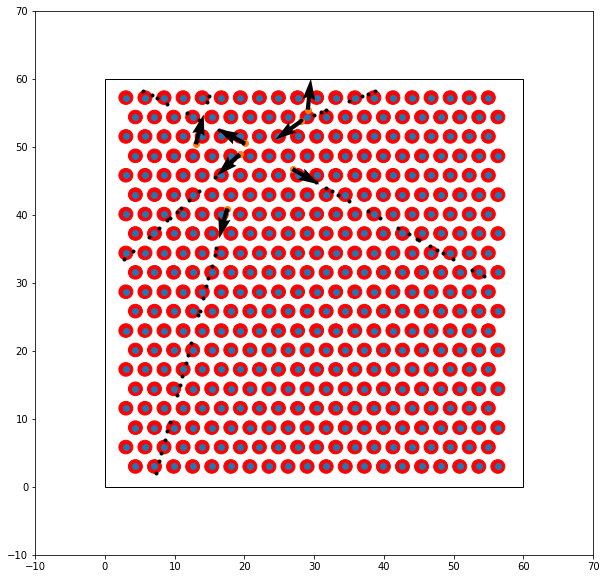

Fission 0 7 47.28462330713317
Scattering 2 8 47.29564669149995
Scattering 1 8 47.37441812300849
Scattering 3 8 47.49828871391569
Scattering 4 8 47.65500677391787
Fission 2 8 48.36605787661311
Adsorption 0 9 48.37102943782568
Fission 3 8 48.6146022781072
Adsorption 7 9 48.778549812958836
Scattering 4 8 49.01005982634681
Fission 0 8 49.05238646835487
Adsorption 2 9 49.53640469722188
Fission 6 8 50.00887283617753
Adsorption 3 9 50.194670555818355
Adsorption 1 8 50.33181395822607
Adsorption 2 7 50.4334924306601
Adsorption 3 6 51.10403677481487
Fission 1 5 51.57185142275359
Wall 3 6 51.6065662630167
Fission 0 6 51.95430874280938
Adsorption 2 7 52.920124115331646
Scattering 2 6 53.1783276482825
Adsorption 3 6 53.45693933319288
Adsorption 0 5 53.45893331030939
Wall 0 4 53.50606411045531
Scattering 2 4 54.40313983072119
Fission 1 4 54.490878432063504
Fission 1 5 55.126253081472356
Scattering 3 6 55.3314628126358
Adsorption 0 6 55.38417555106164
Scattering 4 5 55.8790890252649
Fission 1 5 56.21

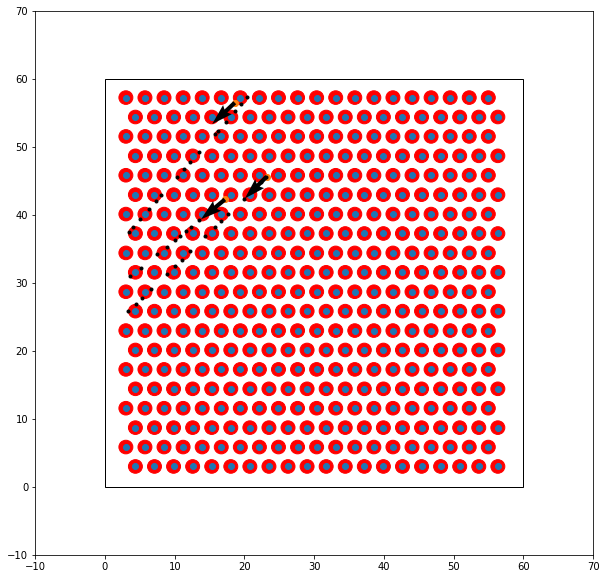

Scattering 2 3 74.07731832873453
Fission 2 3 75.26590558470157
Scattering 3 4 76.42982221293613
Adsorption 0 4 76.90849637108357
Scattering 1 3 77.10847058207372
Fission 2 3 78.26734938936164
Scattering 3 4 79.68260257078784
Fission 0 4 79.94445345649814
Scattering 1 5 80.13825390735383
Scattering 0 5 80.86292733519177
Scattering 2 5 81.28851235068811
Scattering 3 5 81.3450007328707
Scattering 4 5 81.40269208402657
Scattering 0 5 81.6266176226916
Scattering 0 5 82.38029053112494
Adsorption 3 5 82.43482709699538
Scattering 3 4 83.02217969749869
Adsorption 0 4 83.07476781237239
Adsorption 1 3 83.1242141432284
Adsorption 0 2 84.1400022044636
Fission 0 1 84.22154877875712
Scattering 1 2 85.30769103458077
Fission 0 2 85.31453457367071
Scattering 1 3 86.22256457266012
Scattering 2 3 86.65586359459027
Scattering 1 3 87.17726412825934
Fission 2 3 87.74797981561665
Adsorption 0 4 88.5032101584808
Adsorption 0 3 88.81684203619484
Scattering 0 2 89.17885871951347
Adsorption 1 2 90.07768286334934


In [5]:


record = []

for itr in range(MI):
    if active == 0:
        break
    if active == MN:
        break
    
    if itr % PE == 0:
        fig, axs = plt.subplots(figsize=(10, 10))
        for x,y in nuc:
            axs.add_artist(plt.Circle((x, y), AR, color='r'))
        axs.scatter(nuc[:,0],nuc[:,1])
        axs.add_artist(plt.Rectangle((0,0),L,L, linewidth=1, edgecolor='k', facecolor='none') )
        plt.xlim(-10,70)
        plt.ylim(-10,70)

    min_t = np.inf
    for n_i in range(active):
        # Walls
        nx,ny = pos[n_i]
        vx,vy = vel[n_i]
        
        t_up = (L - nx) / vx
        t_dw = (0 - nx) / vx
        t_rx = (L - ny) / vy
        t_lx = (0 - ny) / vy
        
        if t_up >= 0 and t_up < min_t:
            min_t = t_up
            next_event = (n_i,-1,t_up)
        if t_dw >= 0 and t_dw < min_t:
            min_t = t_dw
            next_event = (n_i,-2,t_dw)
        if t_rx >= 0 and t_rx < min_t:
            min_t = t_rx
            next_event = (n_i,-3,t_rx)
        if t_lx >= 0 and t_lx < min_t:
            min_t = t_lx
            next_event = (n_i,-4,t_lx)
        
        for a_i in range(NA):

            ax,ay = nuc[a_i]           

            m = vy / vx # todo div by zero
            c = - m * nx + ny

            A = 1. + m**2
            B = 2 * m * c - 2 * ay * m - 2 * ax
            C = c**2 + ax**2 + ay**2 - AR**2 - 2 * ay * c
            D = B*B - 4 * A * C

            if D >= 0:

                x1 = (- B + np.sqrt(D) )/( 2 * A)
                x2 = (- B - np.sqrt(D) )/( 2 * A)

                t1 = (x1-nx) / vx
                t2 = (x2-nx) / vx

                y1 = c + m * x1
                y2 = c + m * x2


                if itr % PE == 0:
                    if t1 >= 0:
                        plt.plot(x1,y1,'k.')
                    if t2 >= 0:
                        plt.plot(x2,y2,'k.')

                if t1 >= 0 and t1 < min_t:
                    min_t = t1
                    next_event = (n_i,a_i,t1)
                if t2 >= 0 and t2 < min_t:
                    min_t = t2
                    next_event = (n_i,a_i,t2)

    n,a,t = next_event
    pos += vel * t
    time += t
    
    nx,ny = pos[n]
    vx,vy = vel[n]
    
    if a < 0 : # Wall
        print('Wall', n, active, time)
        if a == -1: # up
            pos[n] = [L-0.1,ny]
            vel[n] = [  -vx,vy]
        if a == -2: # dw
            pos[n] = [  0.1,ny]
            vel[n] = [  -vx,vy]
        if a == -3: # rx
            pos[n] = [nx,L-0.1]
            vel[n] = [vx,  -vy]
        if a == -4: # lx
            pos[n] = [nx,  0.1]
            vel[n] = [vx,  -vy]
    else:
        ax,ay = nuc[a]
        dx = nx-ax
        dy = ny-ay
        d2 = dx*dx+dy*dy
        d  = np.sqrt(d2)
        v2 = vx*vx+vy*vy
        v  = np.sqrt(v2)
        dv = dx*vx+dy*vy
        th = np.arccos( dv / d / v )
        h  = (vy*ax-vx*ay+(nx+vx)*ny-(ny+vy)*nx) / v

        if h > 0.5:
            print('Scattering', n, active, time)
            new_vx = vx * rng_st.uniform( AR - h, AR )
            new_vy = vy * rng_st.uniform( AR - h, AR )
            new_v2 = new_vx*new_vx + new_vy*new_vy
            new_vx /= np.sqrt(new_v2)
            new_vy /= np.sqrt(new_v2)
            new_nx = ax + new_vx * AR * 1.1
            new_ny = ay + new_vy * AR * 1.1
            pos[n] = [new_nx,new_ny]
            vel[n] = [new_vx,new_vy]

        else:
            r = rng_st.uniform(0,1)
            if r > 0.5:
                print('Fission', n, active, time)
                new_vx = rng_st.uniform( -1, 1 )
                new_vy = rng_st.uniform( -1, 1 )
                new_v2 = new_vx*new_vx + new_vy*new_vy
                new_vx /= np.sqrt(new_v2)
                new_vy /= np.sqrt(new_v2)
                new_nx = ax + new_vx * AR * 1.1
                new_ny = ay + new_vy * AR * 1.1
                pos[n] = [new_nx,new_ny]
                vel[n] = [new_vx,new_vy]

                new_vx = rng_st.uniform( -1, 1 )
                new_vy = rng_st.uniform( -1, 1 )
                new_v2 = new_vx*new_vx + new_vy*new_vy
                new_vx /= np.sqrt(new_v2)
                new_vy /= np.sqrt(new_v2)
                new_nx = ax + new_vx * AR * 1.1
                new_ny = ay + new_vy * AR * 1.1
                pos[active] = new_nx,new_ny
                vel[active] = new_vx,new_vy
                active += 1
            else:
                print('Adsorption', n, active, time)
                active -= 1
                pos[n] = pos[active]
                vel[n] = vel[active]

    if itr % PE == 0:
        axs.scatter(pos[:active,0],pos[:active,1])
        axs.quiver(pos[:active,0],pos[:active,1],vel[:active,0],vel[:active,1]) 
        plt.show()
        
    record.append([time,active,n,a,t])
    
time,active,n,a,t = np.array(record).T
    

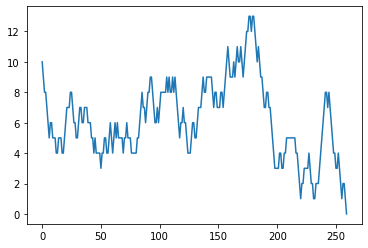

In [12]:
plt.plot(active)

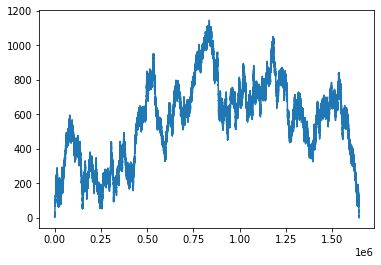

In [29]:
p = 10
pp = []
while p > 0:
    r = rng_st.uniform(0,1)
    if r > 0.5:
        p += 1
    else:
        p -= 1
    pp.append(p)
plt.plot(pp)